# Raw Model For Sentiment Analysis

## Building from scratch : S.A of Text

In [1]:
import string
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
text = open("read.txt", encoding="utf-8").read()

In [3]:
lower_case = text.lower()
cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))
tokenized_words = cleaned_text.split()
print(tokenized_words)

['i', 'apologize', 'for', 'any', 'confusion', 'earlier', 'heres', 'a', 'short', 'essay', 'that', 'explores', 'the', 'theme', 'of', 'sadness', 'title', 'the', 'weight', 'of', 'sorrow', 'exploring', 'the', 'depths', 'of', 'sadness', 'sadness', 'a', 'shadow', 'that', 'occasionally', 'envelops', 'the', 'human', 'heart', 'is', 'a', 'poignant', 'reminder', 'of', 'lifes', 'intricate', 'tapestry', 'of', 'emotions', 'it', 'is', 'an', 'emotion', 'that', 'transcends', 'cultural', 'and', 'societal', 'boundaries', 'binding', 'us', 'in', 'our', 'shared', 'human', 'experience', 'while', 'often', 'considered', 'undesirable', 'sadness', 'serves', 'as', 'a', 'mirror', 'to', 'our', 'vulnerabilities', 'and', 'offers', 'a', 'unique', 'lens', 'through', 'which', 'we', 'perceive', 'the', 'world', 'at', 'its', 'core', 'sadness', 'is', 'a', 'reaction', 'to', 'loss', 'disappointment', 'or', 'unmet', 'expectations', 'it', 'descends', 'upon', 'us', 'like', 'a', 'heavy', 'curtain', 'muffling', 'the', 'joys', 'of',

In [4]:
stop_words = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself",
              "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself",
              "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these",
              "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do",
              "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while",
              "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before",
              "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again",
              "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each",
              "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than",
              "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]


In [5]:
final_words = []
for word in tokenized_words:
    if word not in stop_words:
        final_words.append(word)

In [6]:
emotion_list = []
with open('emotions.txt', 'r') as file:
    for line in file:
        clear_line = line.replace("\n", '').replace(",", '').replace("'", '').strip()
        word, emotion = clear_line.split(':')

        if word in final_words:
            emotion_list.append(emotion)

In [7]:
print(emotion_list)
w = Counter(emotion_list)
print(w)


[' happy', ' sad', ' sad', ' alone', ' attracted']
Counter({' sad': 2, ' happy': 1, ' alone': 1, ' attracted': 1})


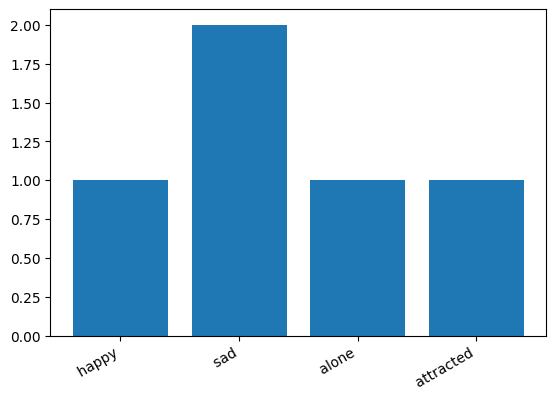

In [8]:
fig, ax1 = plt.subplots()
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()

plt.show()

In [9]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [10]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [11]:
def sentiment_analyse(sentiment_text):
    score = SentimentIntensityAnalyzer().polarity_scores(sentiment_text)
    if score['neg'] > score['pos']:
        print("Negative Sentiment")
    elif score['neg'] < score['pos']:
        print("Positive Sentiment")
    else:
        print("Neutral Sentiment")


In [12]:
print(f"Polarity_Score : {SentimentIntensityAnalyzer().polarity_scores(cleaned_text)}")

Polarity_Score : {'neg': 0.165, 'neu': 0.681, 'pos': 0.154, 'compound': -0.889}


In [13]:
sentiment_analyse(cleaned_text)

Negative Sentiment


# Using Pre-written libraries

In [14]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

[' happy', ' sad', ' sad', ' alone', ' attracted']
Counter({' sad': 2, ' happy': 1, ' alone': 1, ' attracted': 1})
Polarity_Score : {'neg': 0.165, 'neu': 0.681, 'pos': 0.154, 'compound': -0.889}
Negative Sentiment


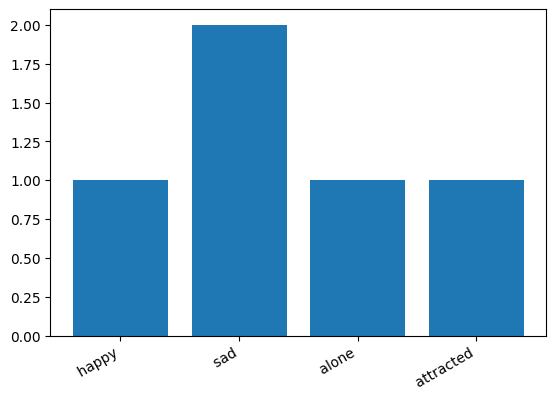

In [15]:
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

text = open('read.txt', encoding='utf-8').read()
lower_case = text.lower()
cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))

tokenized_words = word_tokenize(cleaned_text, "english")

final_words = []
for word in tokenized_words:
    if word not in stopwords.words('english'):
        final_words.append(word)

# Lemmatization - From plural to single + Base form of a word (example better-> good)
lemma_words = []
for word in final_words:
    word = WordNetLemmatizer().lemmatize(word)
    lemma_words.append(word)

emotion_list = []
with open('emotions.txt', 'r') as file:
    for line in file:
        clear_line = line.replace("\n", '').replace(",", '').replace("'", '').strip()
        word, emotion = clear_line.split(':')

        if word in lemma_words:
            emotion_list.append(emotion)

print(emotion_list)
w = Counter(emotion_list)
print(w)


def sentiment_analyse(sentiment_text):
    score = SentimentIntensityAnalyzer().polarity_scores(sentiment_text)
    print(f"Polarity_Score : {score}")
    if score['neg'] > score['pos']:
        print("Negative Sentiment")
    elif score['neg'] < score['pos']:
        print("Positive Sentiment")
    else:
        print("Neutral Sentiment")


sentiment_analyse(cleaned_text)

fig, ax1 = plt.subplots()
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()

## advantage of pre-written algo/ libraries is *SPEED*